<a href="https://colab.research.google.com/github/lucasmeirellesmachado/CDIA-Estatistica_II/blob/main/Atividade_Avaliativa_Semana_de_Imersao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 2ª Semana de Imersão

### Discentes:
Aracy Siqueira de Oliveira Nunes Braga; Cristiane Alves dos Santos;Lucas Meirelles Machado



### Objetivo:
O objetivo desta atividade é descrever os dados de internação hospitalar no SUS, referente às informações do município de Manaus, durante o mês de abril de 2024.

### Passos iniciais

In [101]:
# Importar as bibliotecas que serão utilizadas durante a atividade

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

In [102]:
# Importar a base de dados

SIH_completo = pd.read_csv('/content/drive/MyDrive/Especialização em Ciência de Dados e Inteligência Artificial/Estatística Aplicada II/Cópia de RD202404.csv',
                           sep=';',
                           low_memory=False)

In [103]:
SIH_completo

,UF_ZI,ANO_CMPT,MES_CMPT,ESPEC,CGC_HOSP,N_AIH,IDENT,CEP,MUNIC_RES,NASC,...,DIAGSEC9,TPDISEC1,TPDISEC2,TPDISEC3,TPDISEC4,TPDISEC5,TPDISEC6,TPDISEC7,TPDISEC8,TPDISEC9
0,120000,2024,4,3,4.034526e+12,1224100201423,1,69970000,120060,19970918,...,NaN,0,0,0,0,0,0,0,0,0
1,120000,2024,4,2,4.034526e+12,1224100162714,1,69985000,120042,20031024,...,NaN,0,0,0,0,0,0,0,0,0
2,120000,2024,4,2,4.034526e+12,1224100162901,1,69990000,120033,20070111,...,NaN,0,0,0,0,0,0,0,0,0
3,120000,2024,4,3,4.034526e+12,1224100100652,1,69990000,120033,19730304,...,NaN,0,0,0,0,0,0,0,0,0
4,120000,2024,4,3,4.034526e+12,1224100100685,1,69990000,120033,19461009,...,NaN,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220163,172120,2024,4,3,NaN,1724100353085,1,77900000,172120,19920101,...,NaN,0,0,0,0,0,0,0,0,0
1220164,172120,2024,4,3,NaN,1724100353096,1,77900000,172120,20210417,...,NaN,0,0,0,0,0,0,0,0,0
1220165,172120,2024,4,3,NaN,1724100353107,1,77900000,172120,20210714,...,NaN,0,0,0,0,0,0,0,0,0
1220166,172120,2024,4,3,NaN,1724100353118,1,77900000,172120,19980922,...,NaN,0,0,0,0,0,0,0,0,0


In [104]:
pd.options.display.max_info_columns = 113
SIH_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220168 entries, 0 to 1220167
Data columns (total 113 columns):
 #    Column      Non-Null Count    Dtype  
---   ------      --------------    -----  
 0    UF_ZI       1220168 non-null  int64  
 1    ANO_CMPT    1220168 non-null  int64  
 2    MES_CMPT    1220168 non-null  int64  
 3    ESPEC       1220168 non-null  int64  
 4    CGC_HOSP    906782 non-null   float64
 5    N_AIH       1220168 non-null  int64  
 6    IDENT       1220168 non-null  int64  
 7    CEP         1220168 non-null  int64  
 8    MUNIC_RES   1220168 non-null  int64  
 9    NASC        1220168 non-null  int64  
 10   SEXO        1220168 non-null  int64  
 11   UTI_MES_IN  1220168 non-null  int64  
 12   UTI_MES_AN  1220168 non-null  int64  
 13   UTI_MES_AL  1220168 non-null  int64  
 14   UTI_MES_TO  1220168 non-null  int64  
 15   MARCA_UTI   1220168 non-null  int64  
 16   UTI_INT_IN  1220168 non-null  int64  
 17   UTI_INT_AN  1220168 non-null  int64  
 18   

### Organizando o banco de dados para posterior análise

In [105]:
# Filtrar base para obter os dados do município de Manaus

SIH_filt = SIH_completo[SIH_completo['MUNIC_RES'] == 130260]

In [106]:
SIH_filt

,UF_ZI,ANO_CMPT,MES_CMPT,ESPEC,CGC_HOSP,N_AIH,IDENT,CEP,MUNIC_RES,NASC,...,DIAGSEC9,TPDISEC1,TPDISEC2,TPDISEC3,TPDISEC4,TPDISEC5,TPDISEC6,TPDISEC7,TPDISEC8,TPDISEC9
804,120000,2024,4,3,4.034526e+12,1224100084603,1,69020141,130260,19370420,...,NaN,0,0,0,0,0,0,0,0,0
4048,120000,2024,4,3,4.034526e+12,1224100152088,1,69028120,130260,20000210,...,NaN,0,0,0,0,0,0,0,0,0
20157,130000,2024,4,3,6.972950e+11,1324100333622,1,69021005,130260,19761228,...,NaN,0,0,0,0,0,0,0,0,0
20158,130000,2024,4,3,6.972950e+11,1324100333666,1,69057000,130260,19880225,...,NaN,0,0,0,0,0,0,0,0,0
20159,130000,2024,4,3,6.972950e+11,1324100342488,1,69020210,130260,19480702,...,NaN,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174041,350000,2024,4,1,4.915035e+13,3524102146862,1,69099318,130260,20220205,...,NaN,1,0,0,0,0,0,0,0,0
1188631,350000,2024,4,9,4.915035e+13,3524102146543,1,69068040,130260,20190121,...,NaN,0,0,0,0,0,0,0,0,0
1190896,350000,2024,4,1,4.915035e+13,3524102148424,1,69047460,130260,19980207,...,NaN,0,0,0,0,0,0,0,0,0
1201934,350000,2024,4,7,6.097574e+13,3524107477616,1,69087230,130260,20110613,...,NaN,0,0,0,0,0,0,0,0,0


In [107]:
SIH_filt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9897 entries, 804 to 1210968
Data columns (total 113 columns):
 #    Column      Non-Null Count  Dtype  
---   ------      --------------  -----  
 0    UF_ZI       9897 non-null   int64  
 1    ANO_CMPT    9897 non-null   int64  
 2    MES_CMPT    9897 non-null   int64  
 3    ESPEC       9897 non-null   int64  
 4    CGC_HOSP    9404 non-null   float64
 5    N_AIH       9897 non-null   int64  
 6    IDENT       9897 non-null   int64  
 7    CEP         9897 non-null   int64  
 8    MUNIC_RES   9897 non-null   int64  
 9    NASC        9897 non-null   int64  
 10   SEXO        9897 non-null   int64  
 11   UTI_MES_IN  9897 non-null   int64  
 12   UTI_MES_AN  9897 non-null   int64  
 13   UTI_MES_AL  9897 non-null   int64  
 14   UTI_MES_TO  9897 non-null   int64  
 15   MARCA_UTI   9897 non-null   int64  
 16   UTI_INT_IN  9897 non-null   int64  
 17   UTI_INT_AN  9897 non-null   int64  
 18   UTI_INT_AL  9897 non-null   int64  
 19   UTI_

In [108]:
# Excluir colunas que não serão utilizadas, a fim de tornar a base menos pesada

SIH_final = SIH_filt.drop(columns=['UF_ZI',
                                   'ANO_CMPT',
                                   'MES_CMPT',
                                   'N_AIH',
                                   'CEP',
                                   'UTI_MES_IN',
                                   'UTI_MES_AN',
                                   'UTI_MES_AL',
                                   'UTI_MES_TO',
                                   'UTI_INT_IN',
                                   'UTI_INT_AN',
                                   'UTI_INT_AL',
                                   'HOMONIMO',
                                   'MUNIC_MOV',
                                   'NUM_PROC',
                                   'TOT_PT_SP',
                                   'CPF_AUT',
                                   'HOMONIMO',
                                   'GESTOR_CPF',
                                   'GESTOR_DT',
                                   'SEQUENCIA',
                                   'REMESSA'])

In [109]:
SIH_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9897 entries, 804 to 1210968
Data columns (total 92 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ESPEC       9897 non-null   int64  
 1   CGC_HOSP    9404 non-null   float64
 2   IDENT       9897 non-null   int64  
 3   MUNIC_RES   9897 non-null   int64  
 4   NASC        9897 non-null   int64  
 5   SEXO        9897 non-null   int64  
 6   MARCA_UTI   9897 non-null   int64  
 7   UTI_INT_TO  9897 non-null   int64  
 8   DIAR_ACOM   9897 non-null   int64  
 9   QT_DIARIAS  9897 non-null   int64  
 10  PROC_SOLIC  9897 non-null   int64  
 11  PROC_REA    9897 non-null   int64  
 12  VAL_SH      9897 non-null   float64
 13  VAL_SP      9897 non-null   float64
 14  VAL_SADT    9897 non-null   float64
 15  VAL_RN      9897 non-null   float64
 16  VAL_ACOMP   9897 non-null   float64
 17  VAL_ORTP    9897 non-null   float64
 18  VAL_SANGUE  9897 non-null   float64
 19  VAL_SADTSR  9897 non-null  

In [110]:
#Substituir os valores faltantes das colunas de de diagnóstico secundário por uma célula vazia, que significará a ausência de diagnósticos.
# Nesse sentido, assumimos que os valores faltantes equivalem à ausência de diagnóstico secundário.

SIH_final = SIH_final.fillna ({'DIAGSEC1': '',
                               'DIAGSEC2': '',
                               'DIAGSEC3': '',
                               'DIAGSEC4': '',
                               'DIAGSEC5': '',
                               'DIAGSEC6': '',
                               'DIAGSEC7': '',
                               'DIAGSEC8': '',
                               'DIAGSEC9': ''})

In [111]:
SIH_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9897 entries, 804 to 1210968
Data columns (total 92 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ESPEC       9897 non-null   int64  
 1   CGC_HOSP    9404 non-null   float64
 2   IDENT       9897 non-null   int64  
 3   MUNIC_RES   9897 non-null   int64  
 4   NASC        9897 non-null   int64  
 5   SEXO        9897 non-null   int64  
 6   MARCA_UTI   9897 non-null   int64  
 7   UTI_INT_TO  9897 non-null   int64  
 8   DIAR_ACOM   9897 non-null   int64  
 9   QT_DIARIAS  9897 non-null   int64  
 10  PROC_SOLIC  9897 non-null   int64  
 11  PROC_REA    9897 non-null   int64  
 12  VAL_SH      9897 non-null   float64
 13  VAL_SP      9897 non-null   float64
 14  VAL_SADT    9897 non-null   float64
 15  VAL_RN      9897 non-null   float64
 16  VAL_ACOMP   9897 non-null   float64
 17  VAL_ORTP    9897 non-null   float64
 18  VAL_SANGUE  9897 non-null   float64
 19  VAL_SADTSR  9897 non-null  

### Análise exploratória dos dados gerais

In [112]:
# Verificando a proporção de especialidades dos leitos

SIH_final['ESPEC'].value_counts(normalize=True)*100

,proportion
ESPEC,
1,33.858745
3,29.281600
2,18.965343
7,16.772759
10,0.383955
9,0.333434
5,0.323330
8,0.040416
12,0.040416


([<matplotlib.patches.Wedge at 0x7c4d2511bc90>,
 [Text(0.5342013936462736, 0.9615762429606812, '1'),
  Text(-1.0951152138148093, 0.10355031854777154, '3'),
  Text(-0.16367507672325116, -1.0877547836068744, '2'),
  Text(0.909480440019982, -0.6187449629864151, '7'),
  Text(1.3976127290142069, -0.0817230671075305, '10'),
  Text(1.3990994679466775, -0.05020636206024422, '9'),
  Text(1.399837497329623, -0.021330285275601383, '5'),
  Text(1.399989843695833, -0.005332686800979898, '8'),
  Text(1.399998871608526, -0.0017774967943462586, '12')],
 [Text(0.29138257835251286, 0.524496132524008, '33.86%'),
  Text(-0.597335571171714, 0.05648199193514811, '29.28%'),
  Text(-0.0892773145763188, -0.593320791058295, '18.97%'),
  Text(0.4960802400108992, -0.3374972525380446, '16.77%'),
  Text(0.8984653257948472, -0.052536257426269606, '0.38%'),
  Text(0.8994210865371497, -0.032275518467299855, '0.33%'),
  Text(0.8998955339976146, -0.01371232624860089, '0.32%'),
  Text(0.8999934709473212, -0.0034281558006

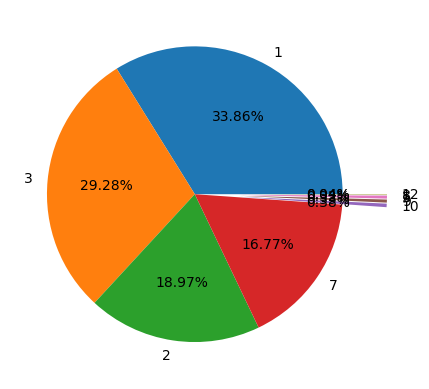

In [113]:
# Visualização gráfica dos leitos

## Criação do objeto

leitos = SIH_final['ESPEC'].value_counts()

## Explodindo (aumentando o tamanho) da fatia dos leitos 10, 9, 5, 8 e 12
explode = [0 if x not in [10, 9, 5, 8, 12] else 0.3 for x in leitos.index]

## Criação do gráfico de pizza
plt.pie(leitos.values,
        labels=leitos.index,
        autopct='%.2f%%',
        explode=explode)

Temos 33,86% de leitos cirúrgicos, 29,28% de leitos de clínica médica, 19% de leitos obstétricos, 16,77% de leitos pediátricos, 0,38% de leitos hospital-dia (AIDS), 0,33% de leitos de hospital-dia (cirúrgicos), 0,32% de leitos psiquiátricos e 0,04% de leitos de reabilitação e 0,04% de leitos de hospital-dia (intercorrência pós-transplantes). Assim, os leitos cirúrgicos, de clínica médica, obstétricos e pediátricos representam aproximadamente 98,91% do total de leitos utilizados no mês estudado.
```


In [114]:
# Verificando a proporção de identificação de AIH

SIH_final['IDENT'].value_counts(normalize=True)*100

,proportion
IDENT,
1,100.0


No período estudado, 100% das AIH são do tipo 1 - Principal, ou seja, indica que todas as internações foram internações iniciais.

([<matplotlib.patches.Wedge at 0x7c4d6553e250>,
 [Text(-0.251430771080205, 1.0708793430419759, '3'),
  Text(0.25143087134316383, -1.0708793195013235, '1')],
 [Text(-0.13714405695283907, 0.5841160052956231, '57.34%'),
  Text(0.1371441116417257, -0.5841159924552672, '42.66%')])

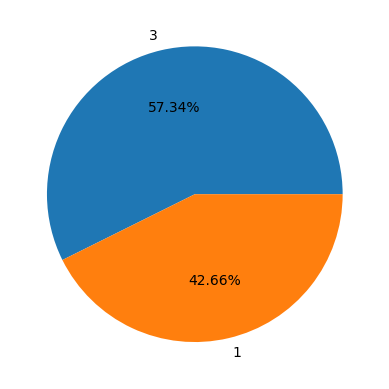

In [115]:
# Visualização gráfica da proporção de sexo

## Criação do objeto

sexo = SIH_final['SEXO'].value_counts()

## Criação do gráfico de pizza
plt.pie(sexo.values,
        labels=sexo.index,
        autopct='%.2f%%')

No período estudado, 42,66% dos usuários internados são do sexo masculino, enquanto que 57,34% são do sexo feminino.

In [116]:
# Verificar a distribuição dos dados referente à quantidade de diárias durante a internação

SIH_final['QT_DIARIAS'].describe()

,QT_DIARIAS
count,9897.000000
mean,5.866525
std,6.915931
min,0.000000
25%,2.000000
50%,3.000000
75%,7.000000
max,108.000000


Text(0, 0.5, 'Quantidade de diárias')

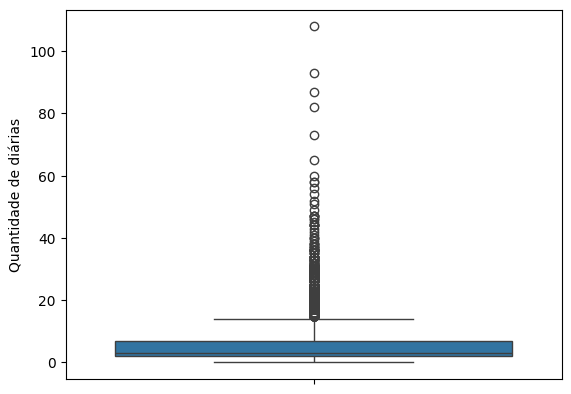

In [117]:
# Visualização gráfica da distribuição dos dados referente às diárias

ax1 = sns.boxplot(y='QT_DIARIAS', data=SIH_final)
ax1.set_ylabel('Quantidade de diárias')

In [118]:
# Distribuição dos dados referente às diárias, dependendo do sexo e da especialidade da internação

SIH_final.groupby(['ESPEC', 'SEXO']).agg({
                                          'QT_DIARIAS': [
                                                          'mean',
                                                          'std',
                                                          'min',
                                                          lambda x: x.quantile(0.25),  # 1º quartil
                                                          lambda x: x.quantile(0.50),  # 2º quartil (mediana)
                                                          lambda x: x.quantile(0.75),  # 3º quartil
                                                          'max']
                                        })

QT_DIARIAS                                                    
                 mean       std min <lambda_0> <lambda_1> <lambda_2>  max
ESPEC SEXO                                                               
1     1      5.969078  7.663050   0       1.00        3.0       7.00  108
      3      4.301161  6.259591   0       1.00        2.0       4.00   93
2     3      4.255194  3.122649   1       2.00        3.0       5.00   31
3     1      8.753503  8.990881   0       3.00        6.0      12.00   82
      3      8.103163  7.824606   0       3.00        5.0      11.00   58
5     1      5.333333  5.499311   1       2.50        4.0       5.50   21
      3      4.400000  4.070433   1       2.00        3.0       5.50   16
7     1      4.831435  5.433652   0       2.00        3.0       6.00   44
      3      4.939898  5.382689   0       2.00        3.0       6.00   54
8     1     14.500000  4.949747  11      12.75       14.5      16.25   18
      3      6.000000  7.071068   1       3.50        6.0       8.50   11
9     1      0.000000  0.000000   0       0.00        0.0       0.00    0
      3      0.000000  0.000000   0       0.00        0.0       0.00    0
10    1      0.000000  0.000000   0       0.00        0.0       0.00    0
      3      0.000000  0.000000   0       0.00        0.0       0.00    0
12    1      0.000000  0.000000   0       0.00        0.0       0.00    0
      3      0.000000  0.000000   0       0.00        0.0       0.00    0

Text(0, 0.5, 'Quantidade de Diárias')

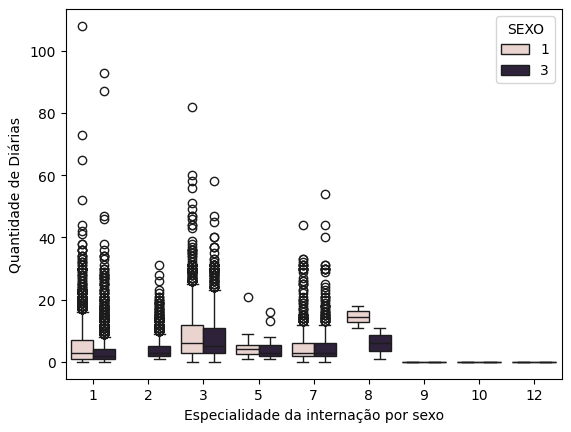

In [119]:
# Visualização gráfica da distribuição dos dados referente às diárias, dependendo do sexo e da especialidade da internação

ax2 = sns.boxplot(x='ESPEC', y='QT_DIARIAS', data=SIH_final, hue='SEXO')
ax2.set_xlabel('Especialidade da internação por sexo')
ax2.set_ylabel('Quantidade de Diárias')

In [139]:
# Verificar a distribuição dos dados referente ao valor total da AIH

SIH_final['VAL_TOT'].describe()

,VAL_TOT
count,9897.000000
mean,1812.588892
std,4578.459249
min,23.450000
25%,469.170000
50%,782.090000
75%,1438.450000
max,129197.240000


Text(0, 0.5, 'Valor total da AIH, em reais')

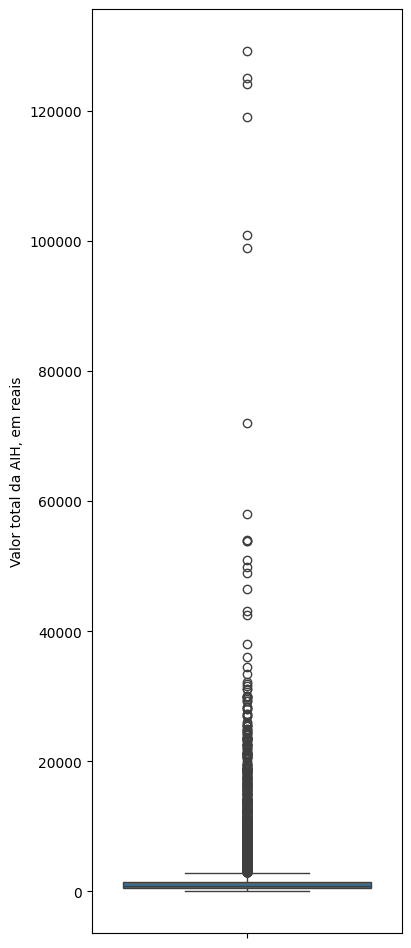

In [144]:
# Visualização gráfica da distribuição dos dados referente ao valor total da AIH

plt.figure(figsize=(4, 12))

ax3 = sns.boxplot(y='VAL_TOT', data=SIH_final)
ax3.set_ylabel('Valor total da AIH, em reais')

In [145]:
SIH_final['DIAG_PRINC'].value_counts()

,count
DIAG_PRINC,
O800,895
J189,311
O820,269
J159,252
I509,175
...,...
G122,1
I071,1
C764,1


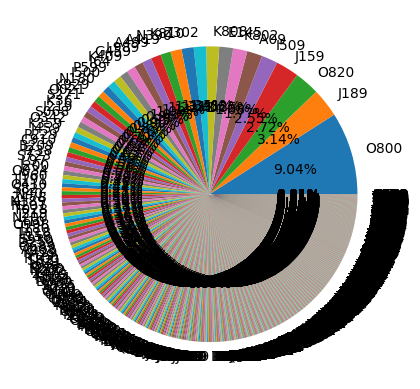

In [147]:
# Visualização gráfica da proporção de diagnósticos principais

## Criação do objeto

DIAG = SIH_final['DIAG_PRINC'].value_counts()

## Criação do gráfico de pizza
plt.pie(DIAG.values,
        labels=DIAG.index,
        autopct='%.2f%%')

plt.show()

### Análise exploratória de dados específicos

In [175]:
# Filtramos os dados da coluna de diagnóstico principal para selecionar apenas as informações de parto, os quais iniciam com O80 - O84.
# Assim, filtramos as linhas que, na coluna de diagnóstico principal, inicia com O8.
# Após, excluímos as demais linhas que começam com números diferentes de O80 - O84.

SIH_partos = SIH_final[SIH_final['DIAG_PRINC'].str.startswith('O8') & # Inclui todas as entradas do capítulo da CID sobre gravidez, parto e puerpério
                       ~SIH_final['DIAG_PRINC'].str.startswith('O85') & # Exclui todas as entradas do capítulo da CID sobre infecção puerperal
                       ~SIH_final['DIAG_PRINC'].str.startswith('O86') & # Exclui todas as entradas do capítulo da CID sobre outras infecções puerperais
                       ~SIH_final['DIAG_PRINC'].str.startswith('O89')] # Exclui todas as entradas do capítulo da CID sobre Complicações da anestesia administrada durante o puerpério

In [176]:
SIH_partos['DIAG_PRINC'].value_counts()

,count
DIAG_PRINC,
O800,895
O820,269
O801,18
O829,12
O809,5
O808,3
O833,1
O822,1
O810,1


In [179]:
agg_result = SIH_partos.groupby(['DIAG_PRINC', 'RACA_COR']).agg({
                                                                  'RACA_COR': 'count'
                                                                })

# Calcular as porcentagens dentro de cada 'DIAG_PRINC'

agg_result['percent'] = agg_result.groupby('DIAG_PRINC')['RACA_COR'].transform(lambda x: (x / x.sum()) * 100)


In [180]:
agg_result

RACA_COR     percent
DIAG_PRINC RACA_COR                      
O80        3                1  100.000000
O800       1               51    5.698324
           2                7    0.782123
           3              775   86.592179
           4               59    6.592179
           5                3    0.335196
O801       1                1    5.555556
           3               15   83.333333
           4                2   11.111111
O808       3                3  100.000000
O809       3                5  100.000000
O810       3                1  100.000000
O820       1               22    8.178439
           2                2    0.743494
           3              227   84.386617
           4               18    6.691450
O822       3                1  100.000000
O829       3               12  100.000000
O833       3                1  100.000000